# Boom Bikes Demand Analysis

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands  
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goals 

The company needs to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

This problem can be solved using Multiple Linear Regression Analysis. The company requires a two fold solution. 
1. A model to predict demand with accuracy.
2. Insight into the significant relationships that exist between demand and available predictors. 

Analysis is carried out using a Mixed Feature Selection Approach. 15 features are selected algorithmically using Recursive Feature Elimination. Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. 
The 10 most significant features to understand demand have been reported. 

The data set is randomly divided into training and test data. 
`Final Model` built on training data set explains 84% of the variability  and  achieves 81% on test data.  
The final relationship between demand and predictors is as follows.    
* ```cnt``` = 2392.0791 + 1946.7864 * ```yr``` + 444.4907 * ```Saturday``` + 466.0136 * ```winter``` - 890.3115 * ```july``` -1063.6669 * ```spring``` + 296.8008 *  ```workingday``` - 1749.8275 * ```hum``` + 4471.6602 * ```temp``` - 1110.3191 * ```windspeed``` - 1273.7519 * ```light snow/rain```   
  
where ```temp``` , ```windspeed``` and ```hum``` are normalized. 

Note :    
- Data has been cleaned to drop outliers that might affect the model adversely
- The model has been verified for Multicollinearity effects. 
- Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit  homoscedasticity)
- Q-Q plot between residual distribution and normal distribution shows that residuals approximately follow a normal distribution. Some points significant deviation which deems further analysis
- Further Lag plot shows there is no auto-correlation in data. 
- Model is stable at 81%(+/-14%) coefficient of determination at 95% CI, ascertained through cross validation.
- Features in the order of influence has been reported by standardizing all predictor values. 
- Outliers dropped during Data Understanding phase deems further analysis from business perspective.


#### Table of Contents : 
- [Reading and Understanding Data](#Reading-and-Understanding-Data)     
    * [Data Quality Checks](#Data-Quality-Checks)  
    * [Visualizing Continuous Variables](#Visualizing-Continuous-Variables)     
    * [Outliers in Continuous Variables](#Outliers-in-Continuous-Variables-vs-cnt)
    * [Visualizing Categorical Variables](#Visualizing-Categorical-Variables)  
    * [Outliers in Categorical Variables](#Outliers-in-Categorical-Variables-vs-cnt)
    * [Correlation](#Correlation)
- [Data Preparation](#Data-Preparation)  
    * [Creating Indictor Variables](#Creating-Indictor-Variables)  
    * [Splitting data set into Test & Train subsets](#Splitting-the-data-set-into-Test-&-Train-subsets) 
    * [Scaling Numerical Features](#Scaling-Numerical-Features)
- [Modelling](#Modelling)   
    * [Recursive Feature Elimination](#Recursive-Feature-Elimination)
    * [Manual Elimination](#Manual-Elimination)
        * [Model 1](#Model-1)
        * [Model 2](#Model-2)
        * [Model 3](#Model-3)
        * [Model 4](#Model-4)
        * [Model 5](#Model-5)
        * [Model 6](#Model-6)   
    * [Verifying MultiCollinearity](#Verifying-MultiCollinearity) 
    * [Final Model](#Final-Model)


   
- [Residual Analysis](#Residual-Analysis)
- [Prediction](#Prediction)
- [Model Evaluation](#Model-Evaluation)
- [Model Stability](#Model-Stability)
- [Top Features](#Top-Features)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding Data

In [25]:
data = pd.read_csv('day.csv')

In [27]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Quality Checks

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Visualizing Continuous Variables

In [33]:
# dropping `instant`,`dteday`,`casual`,`registered` 

data = data.drop(columns=['instant','dteday','casual','registered'])

These variables were dropped since ```instant``` is the just the serial number of the record, 
```dteday``` is redundant coz the required data for analysis is contained in mnth,yr
`casual` + `registered` = `cnt`

In [36]:
# summary statistics of numerical variables
data[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


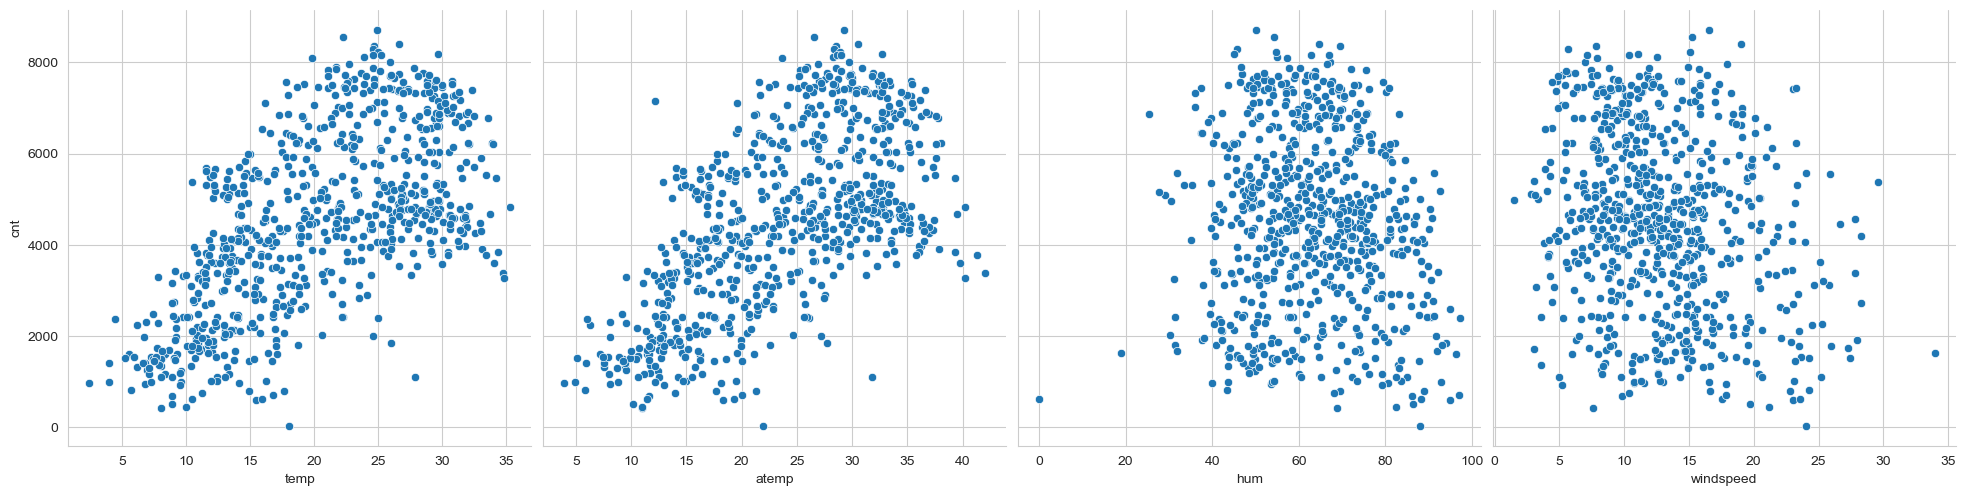

In [38]:
# Scatter Plots of Continuous variables vs 'cnt'
sns.set_style("whitegrid")
sns.pairplot(data=data,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);

- The number of rentals per day seem to be increasing with temperature and adjusted temperature
- adjusted temperature and temperature have similar trends 
- temp vs cnt has two outliers between 15 and 30
- atemp vs cnt has two outliers between 20 and 35
- hum vs cnt has two outliers below 20 
- windspeed vs cnt has one outlier above 30


### Outliers in Continuous Variables vs cnt

In [42]:
## Dropping outliers in continuous variables
# outliers in temp
data = data.drop(index = data[(data['temp'] > 15) & (data['temp'] < 20) & (data['cnt'] < 100)].index)
data = data.drop(index = data[(data['temp'] > 25) & (data['temp'] < 30) & (data['cnt'] < 2000)].index)


# outliers in atemp
data = data.drop(index = data[(data['atemp'] > 20) & (data['atemp'] < 25) & (data['cnt'] < 100)].index)
data = data.drop(index = data[(data['atemp'] > 30) & (data['atemp'] < 35) & (data['cnt'] < 2000)].index)


#outliers in hum
data = data.drop(index = data[(data['hum'] < 20)].index)

#outliers in windspeed
data = data.drop(index = data[(data['windspeed'] > 30)].index)



In [46]:
# Looking at correlation with continuous variables 
correlation = data[['temp','atemp','hum','windspeed','cnt']].corr()['cnt'].apply(lambda x : round(x,4))
correlation = pd.DataFrame(correlation).sort_values(by='cnt',ascending=False)
correlation.drop(index=['cnt'],inplace=True)
# dropping registered,casual, instant
correlation.style.background_gradient(cmap='GnBu')

,cnt
atemp,0.638900
temp,0.635600
hum,-0.107600
windspeed,-0.218100


- ```adjusted temperature``` has the highest positive correlation with ```cnt``` followed by ```temperature```. 
- ```hum``` has the lowest correlation. 

In [49]:
# correlation between ```temp``` and ```atemp```
data[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991726
atemp,0.991726,1.000000


- Since, the correlation between ```temp``` and ```atemp``` is almost 1, one of them could be dropped. 
- ```atemp``` represents adjusted temperature which is an indicator of ```how hot it actually feels like``` which is a compound measure of temperature,humidity and windspeed. [Ref : UK Meteorological Dept](https://blog.metoffice.gov.uk/2012/02/15/what-is-feels-like-temperature/)
- ```atemp``` might cause bias in data because it's a compound variable, Instead we could use ```temp``` , ```hum```  , ```windspeed```. Hence , dropping ```atemp```. Also it makes business sense to keep ```temp``` and calcuate adjusted temperature from it. 

In [52]:
# dropping ```atemp```
data = data.drop(columns=['atemp'])

In [54]:
data[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.122673,-0.160295
hum,0.122673,1.000000,-0.247498
windspeed,-0.160295,-0.247498,1.000000


- There's no signifcant correlation between ```atemp``` and ```hum``` , ```windspeed```.
- Hence these are not dropped for now.


### Visualizing Categorical Variables

In [60]:
# Converting variables into categorical type 
data[['season','weathersit','mnth']] = data[['season','weathersit','mnth']].astype('category')

In [62]:
# Unique values in each categorical variable / [To check for disguised missing values]
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in cat_vars : 
    print('Unique values in ',i, data[i].unique())

Unique values in  season [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
Unique values in  yr [0 1]
Unique values in  mnth [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
Unique values in  holiday [0 1]
Unique values in  weekday [6 0 1 2 3 4 5]
Unique values in  workingday [0 1]
Unique values in  weathersit [2, 1, 3]
Categories (3, int64): [1, 2, 3]


- No disguised missing values exist

In [65]:
# Replacing numbers with labels 
season_labels = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

mnth_labels = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

weekday_labels = { # considering the first row of dteday to be 01-01-2011
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

weathersit_labels = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow/rain'
}

# replacing numerals with labels 
data['season'] = data['season'].replace(season_labels)
data['mnth'] = data['mnth'].replace(mnth_labels)
data['weekday'] = data['weekday'].replace(weekday_labels)
data['weathersit'] = data['weathersit'].replace(weathersit_labels)

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


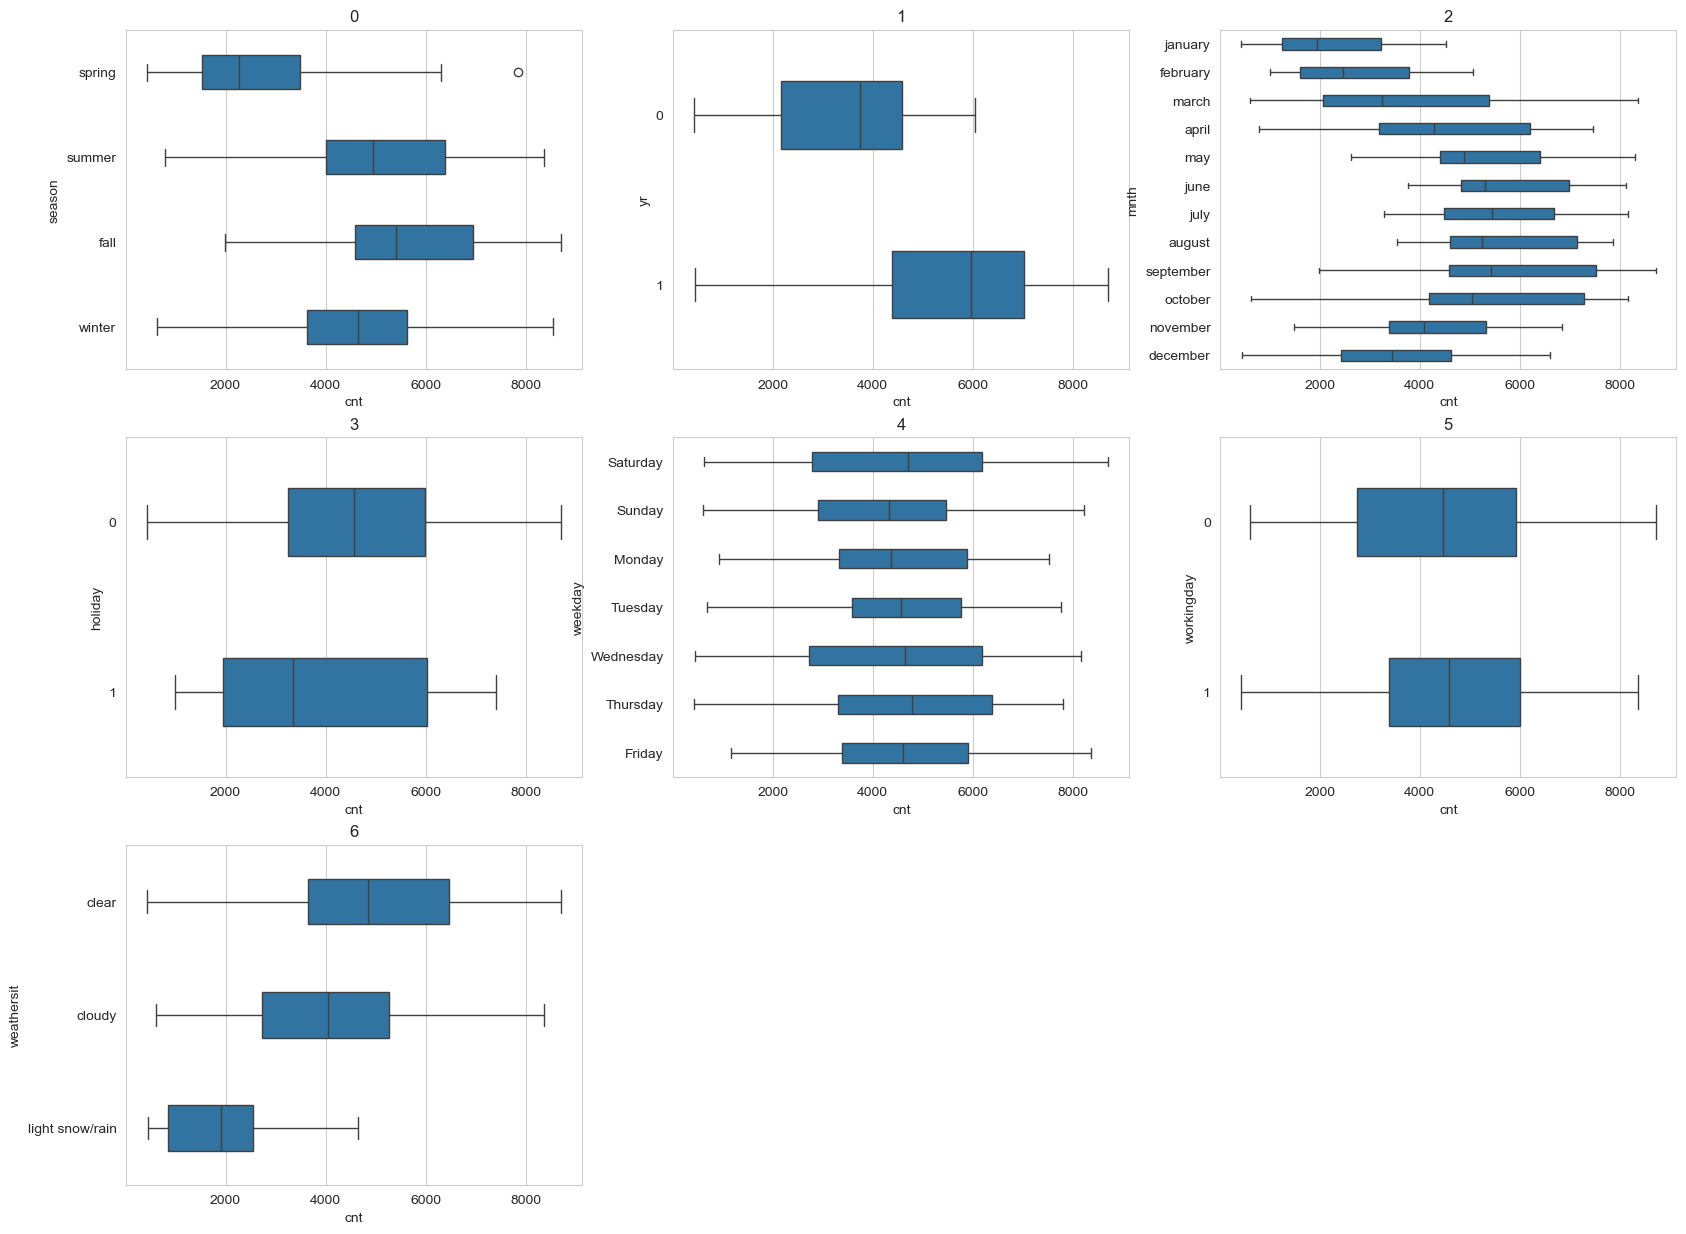

In [67]:
cat_vars = ['season','yr','mnth','holiday','weekday',  'workingday','weathersit']
data1 = data[cat_vars]
data1.loc[:,'cnt'] = data['cnt'].values
data1[['yr','holiday','workingday']] = data1[['yr','holiday','workingday']].astype('category')
plot_dim = [3,3]
fig,axs = plt.subplots(*plot_dim)
fig.set_figheight(15)
fig.set_figwidth(20)
for i in range(plot_dim[0]) :  
    for j in range(plot_dim[1]) :
        axs[i,j].set(title = i*plot_dim[1]+j)
        sns.boxplot(data=data1,x='cnt',y=cat_vars[i*plot_dim[1]+j],width=0.4,ax=axs[i,j])
        if i*plot_dim[1]+j == 6 : 
            break
axs[2,1].set_axis_off()
axs[2,2].set_axis_off()

- From the season vs rentals per day plot , fall has the highest average rentals followed by summer. 
- Looking at year by year rentals, 2019 has had a median 2000 increase in rentals compared to 2018.
- From the month wise plot, September has the highest rentals, followed by the two months surrounding it. It seems like the trend is explained by seasonal rentals too
- Holidays show lower rental count compared to working days, with greater variability in demand on holidays. 
- There is no significant difference between rentals vs weekdays, except that Thursdays and sundays have a higher variation in rentals than others.  

### Outliers in Categorical Variables vs cnt

In [71]:
# Dropping outliers in Categorical Variables 
data = data.drop(index = data[(data['season'] == 'spring') & (data['cnt'] > 7000)].index)


### Correlation 

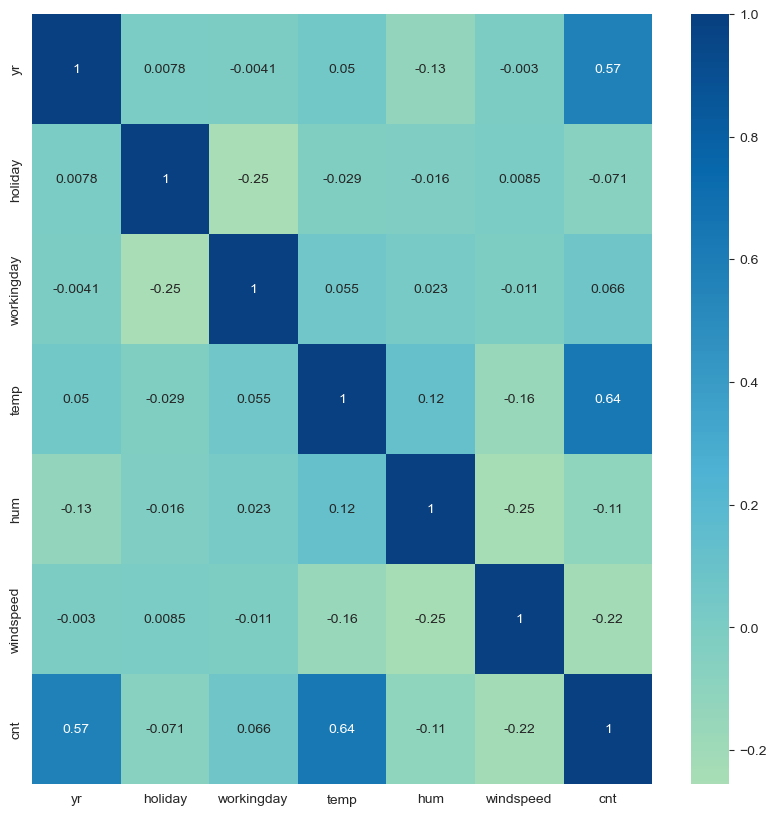

In [77]:
# correlation among variables

numeric_data = data.select_dtypes(include=[np.number])

# Generate the heatmap
plt.figure(figsize=[10,10])
sns.heatmap(numeric_data.corr(), cmap='GnBu', center=0, annot=True)
plt.show()

* Highest correlation with ```cnt``` is seen in ```temp``` followed by ```yr```

## Data Preparation

### Creating Indicator Variables 

In [84]:
# creating indicator variable columns
season_indicators = pd.get_dummies(data['season'],drop_first=True)
mnth_indicators = pd.get_dummies(data['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(data['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(data['weathersit'],drop_first=True)

In [86]:
# adding indicator variable columns to the dataset . Dropping original columns
data = pd.concat([data,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)
data = data.drop(columns=['season','mnth','weekday','weathersit'])

In [88]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,november,december,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [90]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'february', 'march', 'april', 'may', 'june',
       'july', 'august', 'september', 'october', 'november', 'december',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'cloudy', 'light snow/rain'],
      dtype='object')

|  Variable 	| Reference Label  	|
|---	|---	|
|  season 	|   fall	|
|  mnth 	|   april	|
|   weekday	|   Friday	|
|   weathersit	|   clear	|


### Splitting the data set into Test & Train subsets

In [96]:
from sklearn.model_selection import train_test_split

In [98]:
dtrain,dtest = train_test_split(data,train_size=0.7,test_size=0.3,random_state=120)

### Scaling Numerical Features

In [101]:
# normalization of continuous variables
from sklearn.preprocessing import MinMaxScaler 
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']

numerical_scaler.fit(dtrain[num_vars])
dtrain[num_vars] = numerical_scaler.transform(dtrain[num_vars])

#### X_train , y_train

In [106]:
y_train = dtrain.pop('cnt')
X_train = dtrain

In [108]:
y_train.head()

231    5191
717    5267
107    3429
595    4549
485    5740
Name: cnt, dtype: int64

In [110]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,february,...,november,december,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
231,0,0,0,0.795440,0.584687,0.155696,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
717,1,0,1,0.340632,0.516822,0.355128,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
107,0,0,1,0.564921,0.401392,0.303720,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
595,1,0,0,0.718600,0.636891,0.110569,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
485,1,0,1,0.690564,0.564384,0.285008,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [112]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'february', 'march', 'april', 'may', 'june', 'july',
       'august', 'september', 'october', 'november', 'december', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'cloudy',
       'light snow/rain'],
      dtype='object')

## Modelling 

Approach 
- A mixed approach is followed.    
- 15 Best columns are chosen using RFE    
- And then p-value method is followed for further elimination.  

#### Recursive Feature Elimination

In [117]:
# Selecting 15 Features using RFE 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)


In [121]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
17,1,True,october
16,1,True,september
14,1,True,july
26,1,True,cloudy
12,1,True,may
10,1,True,march
8,1,True,winter
27,1,True,light snow/rain
6,1,True,summer


In [123]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'october', 'september', 'july', 'cloudy', 'may', 'march',
       'winter', 'light snow/rain', 'summer', 'windspeed', 'hum', 'temp',
       'holiday', 'fall'], dtype=object)

In [125]:
# Following a stepwise elimination
import statsmodels.api as sm
def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))


#### Model 1
- Using features selected by RFE : 'yr', 'Sunday', 'Saturday', 'november', 'january', 'december',
       'winter', 'july', 'spring', 'holiday', 'workingday', 'hum', 'temp',
       'windspeed', 'light snow/rain'

In [136]:
print(X_train[features_1].dtypes)
print(y_train.dtypes)


yr                   int64
october               bool
september             bool
july                  bool
cloudy                bool
may                   bool
march                 bool
winter                bool
light snow/rain       bool
summer                bool
windspeed          float64
hum                float64
temp               float64
holiday              int64
fall                  bool
dtype: object
int64


In [138]:
X_train[features_1] = X_train[features_1].astype(int)


In [140]:
print(X_train[features_1].dtypes)


yr                 int32
october            int32
september          int32
july               int32
cloudy             int32
may                int32
march              int32
winter             int32
light snow/rain    int32
summer             int32
windspeed          int32
hum                int32
temp               int32
holiday            int32
fall               int32
dtype: object


In [142]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     137.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.24e-154
Time:                        21:38:13   Log-Likelihood:                -4154.0
No. Observations:                 506   AIC:                             8336.
Df Residuals:                     492   BIC:                             8395.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1757.3733     99.992     

#### Model 2 : 
- Dropping ```holiday``` because of high p-value

In [147]:
del_feature = 'holiday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     146.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.03e-154
Time:                        21:39:39   Log-Likelihood:                -4158.0
No. Observations:                 506   AIC:                             8342.
Df Residuals:                     493   BIC:                             8397.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1721.3764     99.869     

#### Model 3 : 
- Dropping ```Sunday``` because of high p-value

In [152]:
del_feature = 'Sunday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     146.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.03e-154
Time:                        21:40:09   Log-Likelihood:                -4158.0
No. Observations:                 506   AIC:                             8342.
Df Residuals:                     493   BIC:                             8397.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1721.3764     99.869     

#### Model 4 
- Dropping ```january``` because this information might also be contained in ```winter```.

In [157]:
del_feature = 'january'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     146.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.03e-154
Time:                        21:40:41   Log-Likelihood:                -4158.0
No. Observations:                 506   AIC:                             8342.
Df Residuals:                     493   BIC:                             8397.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1721.3764     99.869     

#### Model 5 
- Dropping ```december``` because this information might also be contained in ```winter```.

In [162]:
del_feature = 'december'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     146.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.03e-154
Time:                        21:41:20   Log-Likelihood:                -4158.0
No. Observations:                 506   AIC:                             8342.
Df Residuals:                     493   BIC:                             8397.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1721.3764     99.869     

#### Model 6 
- Dropping ```november``` because this information might also be contained in ```winter```.

In [165]:
del_feature = 'november'
selected_features = selected_features[selected_features!=del_feature]
final_model = ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     146.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.03e-154
Time:                        21:41:45   Log-Likelihood:                -4158.0
No. Observations:                 506   AIC:                             8342.
Df Residuals:                     493   BIC:                             8397.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1721.3764     99.869     

## Verifying MultiCollinearity 

In [171]:
vif(X_train[selected_features])

              index       vif
0             const  6.117827
14             fall  2.406429
8            winter  2.059651
10           summer  1.827905
4              july  1.526448
2           october  1.462767
6               may  1.382816
3         september  1.318558
7             march  1.165092
5            cloudy  1.044248
11        windspeed  1.028017
9   light snow/rain  1.026134
1                yr  1.008494
12              hum       NaN
13             temp       NaN


- VIF < 5 for selected features. No significant multicollinearity observed. Similar indicating comparison of R-squared and adjusted R-squared.

## Final Model

In [177]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     146.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.03e-154
Time:                        21:43:24   Log-Likelihood:                -4158.0
No. Observations:                 506   AIC:                             8342.
Df Residuals:                     493   BIC:                             8397.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1721.3764     99.869     

- 10 features have been selected. 
- All the features are statistically significant [low p-value]
- The model over is a good fit with Prob (F-statistic): 4.89e-187
- The model explains 83.6% variability in the training data. Adjusted R-square being 83.3%

## Residual Analysis


TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

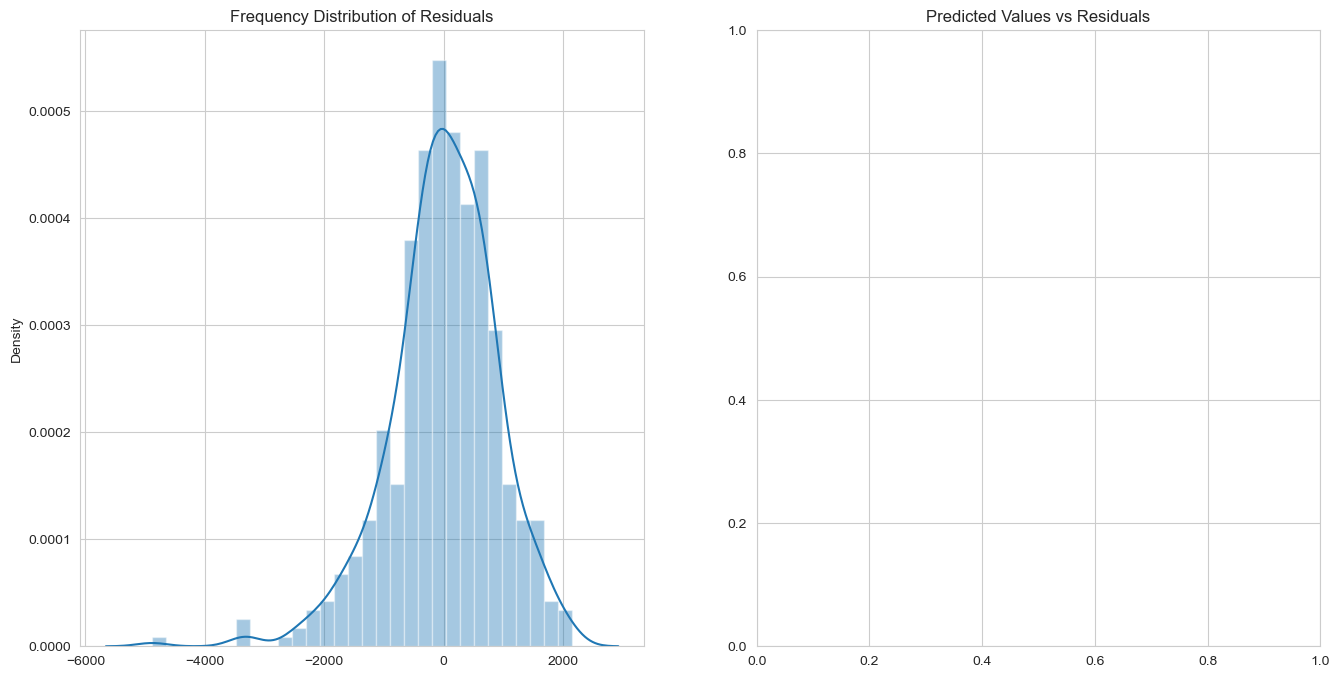

In [186]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(y_train_pred,y_train-y_train_pred,ax=ax[1])
plt.show()

In [188]:
# Mean of Residuals
(y_train-y_train_pred).mean()

1.15430335470074e-11

Residual errors follow a normal distribution with mean=0
Variance of Errors doesnt follow any trends
Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.


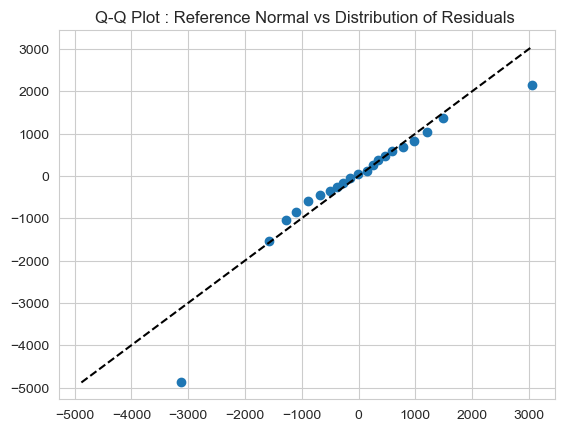

In [191]:
# Verifying the normality of distribution of residuals 
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
m = plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.savefig('q-q-plot.png')
plt.show()

- This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data. 


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

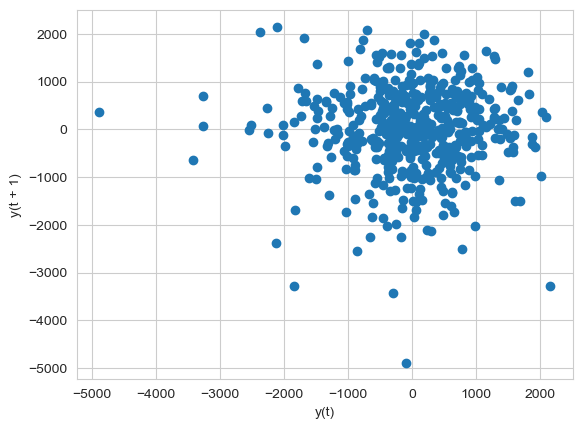

In [196]:
# lag plot to assess independence of data points
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)

- Lagplot of residuals shows no trend. Hence the error terms have constant variance 

**Hence, assumptions of Linear Regression are satisfied by this model**

## Prediction 

In [202]:
y_test = dtest.pop('cnt')
X_test = dtest
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [204]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

## Model Evaluation

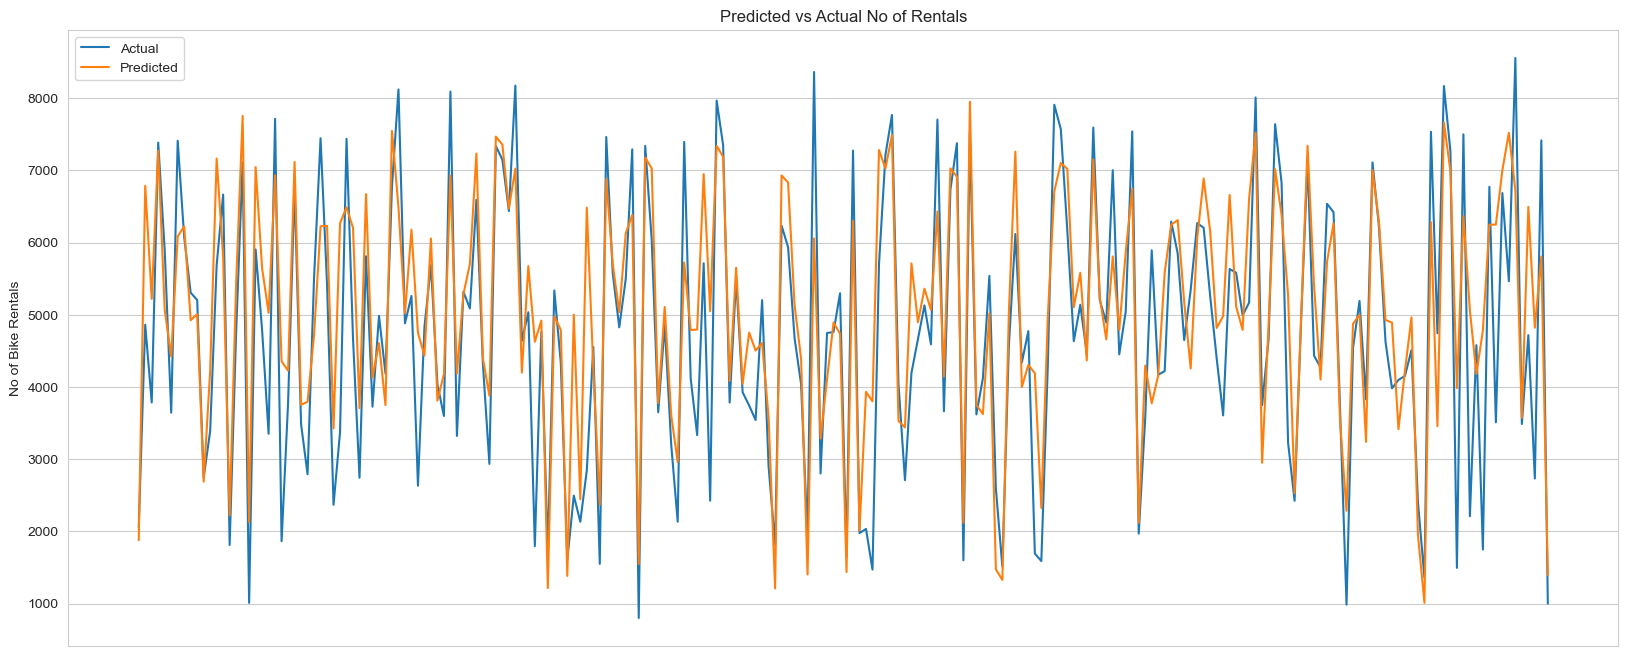

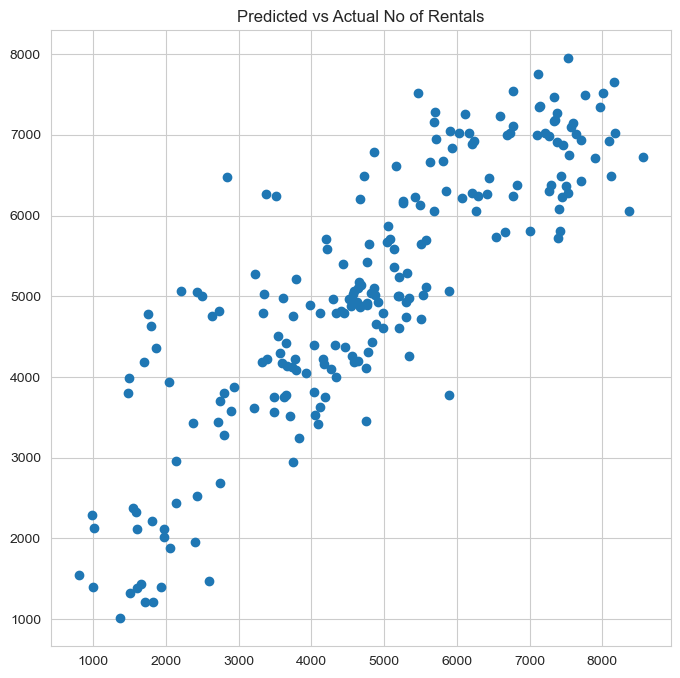

In [209]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual No of Rentals');

- Predicted vs observed value plots shows that the model is reasonably accurate. 

In [216]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))


R-squared for train data: 0.78
R-squared for test data: 0.7


## Model Stability 

In [221]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.80498996, 0.79104067, 0.65126635, 0.84938913, 0.8197825 ,
       0.80683947, 0.7514134 , 0.65811763, 0.5734817 , 0.8161986 ])

In [223]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.75 (+/- 0.17)


In [225]:
selected_features

array(['yr', 'october', 'september', 'july', 'cloudy', 'may', 'march',
       'winter', 'light snow/rain', 'summer', 'windspeed', 'hum', 'temp',
       'fall'], dtype=object)

## Top Features

In [230]:
# standardizing numerical variables 

from sklearn.preprocessing import StandardScaler
reg_features = selected_features
scaler = StandardScaler()
data = X_train[selected_features]
std_num = scaler.fit(data[['temp','windspeed','hum']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed','hum']]), columns=['temp','windspeed','hum'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [1721.37639728]


,MLR Coefficients
fall,3.058853e+03
summer,2.312191e+03
yr,2.054157e+03
winter,1.917865e+03
windspeed,1.100255e+03
october,1.024129e+03
may,6.675746e+02
september,5.181372e+02
march,5.062111e+02
hum,9.094947e-13


* Upon standardized the values of predictor variables, the above shows that the top features influencing demand are ```temp```, followed by ```yr``` and ```hum```
* In case of continuous variables, the above data could be interpreted as - With every standard deviation increase in continuous variables, demand increases by `xxx`, when all other modelled paramters are held unchanged. 
* In case of categorical variables, the above data could be interpreted as - Compared to the reference level, the change in demand is `xxx`,, when all other modelled paramters are held unchanged. 

## Conclusion

Analysis is carried out using a Mixed Feature Selection Approach. 15 features are selected algorithmically using Recursive Feature Elimination. Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. 
The 10 most significant features to understand demand have been reported. 

The data set is randomly divided into training and test data. 
`Final Model` built on training data set explains 84% of the variability  and  achieves 81% on test data.  
The final relationship between demand and predictors is as follows.    
* ```cnt``` = 2392.0791 + 1946.7864 * ```yr``` + 444.4907 * ```Saturday``` + 466.0136 * ```winter``` - 890.3115 * ```july``` -1063.6669 * ```spring``` + 296.8008 *  ```workingday``` - 1749.8275 * ```hum``` + 4471.6602 * ```temp``` - 1110.3191 * ```windspeed``` - 1273.7519 * ```light snow/rain```   
  
where ```temp``` , ```windspeed``` and ```hum``` are normalized. 

Note :    
- Data has been cleaned to drop outliers that might affect the model adversely
- The model has been verified for Multicollinearity effects. 
- Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit  homoscedasticity)
- Q-Q plot between residual distribution and normal distribution shows that residuals follow a normal distribution for all interpolations. Extraplorations show significant deviation, not affecting Linear Regression applicability. 
- Further Lag plot shows there is no auto-correlation in data. 
- Model is stable at 81%(+/-14%) coefficient of determination at 95% CI, ascertained through cross validation.
- Features in the order of influence has been reported by standardizing all predictor values. 